In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
#TODO: uninstall stuff (homebrew etc.)

In [3]:
import os
import numpy as np
import warnings
from astropy.io import fits
from astropy.table import Table
from pyqsofit.PyQSOFit import QSOFit

from main_code.constants import *
from main_code import qsofit
from main_code import data_reading
from main_code import helpers
from main_code import plotting

warnings.simplefilter(action='default') # Or 'always' to see them every time
warnings.showwarning = lambda msg, *args: print(f"WARNING:\n\t{msg}", flush=True)

In [4]:
# make Ha good first

#TODO: try turning off power law continuum and iron
#TODO: try get v6 back

In [5]:
helpers.get_kwargs_from_log("SDSS_2021_v25", exclude_log_items=True)

{'name': 'SDSS_2021_v25',
 'nsmooth': 1,
 'and_mask': False,
 'or_mask': False,
 'reject_badpix': False,
 'deredden': False,
 'wave_range': (3900, 9000),
 'wave_mask': None,
 'decompose_host': True,
 'host_prior': False,
 'host_prior_scale': 0.2,
 'host_line_mask': True,
 'decomp_na_mask': True,
 'qso_type': 'global',
 'npca_gal': 10,
 'host_type': 'BC03',
 'npca_qso': 5,
 'Fe_uv_op': True,
 'poly': True,
 'BC': False,
 'rej_abs_conti': True,
 'rej_abs_line': True,
 'initial_guess': None,
 'n_pix_min_conti': 50,
 'param_file_name': 'qsopar4.fits',
 'MC': False,
 'MCMC': False,
 'nburn': 20,
 'nsamp': 200,
 'nthin': 10,
 'epsilon_jitter': 0.0,
 'linefit': True,
 'save_result': True,
 'plot_fig': True,
 'save_fig': True,
 'plot_corner': True,
 'save_fits_path': 'output/',
 'save_fits_name': None,
 'verbose': True,
 'kwargs_plot': {'save_fig_path': 'output/', 'broad_fwhm': 1200},
 'kwargs_conti_emcee': {},
 'kwargs_line_emcee': {}}

In [22]:
# output_file_name = helpers.get_output_file_name(fname=data_fname)
# 
output_file_name = "SDSS_2001_v20"

In [ ]:
# Your parameters
use_example_params = True
data_fname = FNAME_2001

lam_bounds = TOTAL_LAM_BOUNDS

params_path = "qsofit_example/" if use_example_params else "data/qsofit/"
params_file_name = "qsopar.fits" if use_example_params else "qsopar21.fits"


filter_bad_values = True
interpolate_bad_values = False

if data_fname in [FNAME_2001, FNAME_2021, FNAME_2022]:
    lam, flux, err = data_reading.get_sdss_lam_flux_err(
        fname=data_fname,
        filter_bad_values=filter_bad_values,
        interpolate_bad_values=interpolate_bad_values,
        lam_bounds=lam_bounds
    )
elif data_fname in [
    FNAME_2015_BLUE_3_ARCSEC, FNAME_2015_RED_3_ARCSEC,
    FNAME_2015_BLUE_4_ARCSEC, FNAME_2015_RED_4_ARCSEC
]:
    lam, flux, err = data_reading.get_sami_lam_flux_err(
        fname=data_fname,
        filter_bad_values=filter_bad_values,
        interpolate_bad_values=interpolate_bad_values,
        lam_bounds=lam_bounds
    )
else:
    raise ValueError("Invalid data_fname")

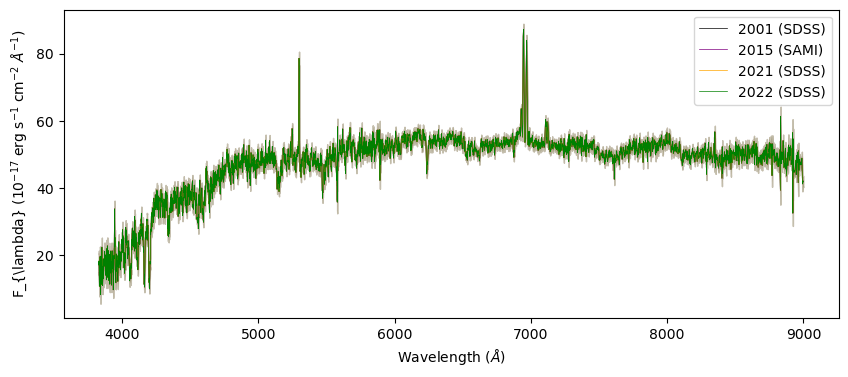

In [7]:
plotting.plot_spectra(
    lam, lam, lam, lam,
    flux, flux, flux, flux,
    True, err, err, err, err
)

In [ ]:
kwargs = {
    # "name": "SDSS_2021_v19",                   # default None
    "name": output_file_name,                   # default None
    
    "nsmooth": 1,                               # default 1    
    "and_mask": False,                          # default False
    "or_mask": False,                           # default False
    "reject_badpix": False,                     # default True
    "deredden": False,                          # default True
    "wave_range": None,                   # default None
    "wave_mask": None,                          # default None
    
    "decompose_host": True,                     # default True
    "host_prior": False,                        # default False
    "host_prior_scale": 0.2,                    # default 0.2
    "host_line_mask": True,                     # default True
    "decomp_na_mask": True,                     # default False
    
    "qso_type": "CZBIN1",                       # default "global"
    "npca_qso": 10,                             # default 10
    "host_type": "BC03",                        # default "BC03"
    "npca_gal": 5,                              # default 5
    
    "Fe_uv_op": False,                          # default True
    "poly": True,                              # default False
    "BC": False,                                # default False
    "rej_abs_conti": True,                     # default False
    "rej_abs_line": False,                      # default False
    "initial_guess": None,                      # default None
    "n_pix_min_conti": 50,                     # default 100

    "param_file_name": params_file_name,        # default "qsopar.fits"

    "MC": False,                                # default False
    "MCMC": False,                              # default False
    "nburn": 20,                                # default 20
    "nsamp": 200,                               # default 200
    "nthin": 10,                                # default 10
    "epsilon_jitter": 0.,                       # default 0.
    
    "linefit": True,                            # default True
    
    "save_result": True,                        # default True
    "plot_fig": True,                           # default True
    "save_fig": True,                           # default True
    "plot_corner": True,                        # default True
    
    "save_fits_path": "output/",                # default "."
    "save_fits_name": None,                     # default None

    "verbose": False,                            # default False

    "kwargs_plot": {                            # default {}
        "save_fig_path": "output/",
        "broad_fwhm": 1200
    },
    "kwargs_conti_emcee": {},                   # default {}
    "kwargs_line_emcee": {},                    # default {}
}

if os.path.exists(f"output/{output_file_name}.pdf"):
    raise ValueError(f"File {output_file_name}.pdf already exists")
elif os.path.exists(f"output/{output_file_name}.fits"):
    raise ValueError(f"File {output_file_name}.fits already exists")
elif os.path.exists(f"output/{kwargs['name']}.pdf"):
    raise ValueError(f"File {kwargs['name']}.pdf already exists")
elif os.path.exists(f"output/{kwargs['name']}.fits"):
    raise ValueError(f"File {kwargs['name']}.fits already exists")
with open("log.csv", "r") as f:
    if output_file_name in f.read(): #TODO: figure out why f.read() is returning empty string
        raise ValueError(f"File {output_file_name} already exists")
    elif kwargs['name'] in f.read():
        raise ValueError(f"File {kwargs['name']} already exists")


# ======= Create and run QSOFit =======
q = QSOFit(
    lam=lam, flux=flux, err=err,
    z=Z_SPEC,
    path=params_path
)


# q.Fit(**kwargs)
q.Fit(name=output_file_name, nsmooth=1, deredden=False, reject_badpix=False, wave_range=None, \
      wave_mask=None, decompose_host=True, host_prior=True, decomp_na_mask=True, npca_gal=5, npca_qso=10, qso_type='CZBIN1',\
      Fe_uv_op=False, poly=False, BC=False, rej_abs_conti=False, rej_abs_line=False, MCMC=False, \
      save_result=False, plot_fig=True, save_fig=False, save_fits_path="output/", save_fits_name=None
)

kwargs_log = {
    "output_file_name": output_file_name,
    "data_fname": data_fname,
    "params_file_name": str(params_file_name),
    "lam_bounds": lam_bounds,
    "filter_bad_values": filter_bad_values,
    "interpolate_bad_values": interpolate_bad_values
} | kwargs
kwargs_log.pop("name")
helpers.log_kwargs(kwargs_log)

	unclosed file <_io.BufferedReader name='qsofit_example/qsopar.fits'>
	Mean of empty slice.
	invalid value encountered in scalar divide
	Degrees of freedom <= 0 for slice
	invalid value encountered in divide
	invalid value encountered in scalar divide
	Mean of empty slice.
	unclosed file <_io.BufferedReader name='/opt/anaconda3/envs/denison/lib/python3.11/site-packages/pyqsofit/pca/Yip_pca_templates/qso_eigenspec_Yip2004_CZBIN1.fits'>
	unclosed file <_io.BufferedReader name='qsofit_example/qsopar.fits'>
	unclosed file <_io.BufferedReader name='qsofit_example/qsopar.fits'>


In [27]:
qsofit.edit_qsopar(
    value_name_to_edit="minsca",
    ext_num=3,
    new_value=0,
    col_name_and_val=("initial", "PL_norm"),
    file_name="qsopar0.fits",
    make_copy=True
)

	initial = PL_norm not found in the table.


In [ ]:
# Read the line priors
qsopar = fits.open('qsofit_example/qsopar.fits')
line_priors = Table(qsopar['LINE_PRIORS'].data)

# Display the Hα and Hβ complex lines
print(line_priors[['linename', 'ngauss', 'minsig', 'maxsig', 'vindex', 'windex']])